# Data cleaning

## Setup

### Import modules

In [172]:
# Data manipulation

import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

import numpy as np
import re
import sklearn 

# Plotting

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  
import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

# Miscellaneous

import rootpath
import glob

### Locate files

In [14]:
# Set root path for project

rpath = rootpath.detect()

### Compile data

In [15]:
# Concatenate dataframes rowwise

df_raw = (
    pd.concat(
        [pd.read_csv(file, index_col=0) \
                for file in glob.glob(f"{rpath}/data/raw/*.csv")],
              ignore_index=True)
    )


## Examine data

In [16]:
df_raw.shape

(2390, 14)

In [17]:
df_raw.head()

,use_category,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,perc_respondrec,total_reviews,link,page
0,cleanser,face wash,normal,Peter Thomas Roth,Travel Size Anti-Aging Cleansing Gel,Size 2.0 oz|,Price\n$12.00,"Oil-free, anti-wrinkle technology helps to cla...","Water/Aqua/Eau, Sodium Laureth Sulfate, Cocami...",4.2,NaN,39 Reviews,https://www.ulta.com/travel-size-anti-aging-cl...,3.0
1,cleanser,face wash,normal,Awake Beauty,Glow Smoothie Jelly Cleanser,Size 5 oz|,Price\n$22.00,Glow Smoothie Jelly Cleanser from Awake is a s...,"Water/Aqua/Eau, Glycereth-18 Ethylhexanoate, G...",4.8,NaN,21 Reviews,https://www.ulta.com/glow-smoothie-jelly-clean...,3.0
2,cleanser,face wash,normal,Vichy,Pureté Thermale Mineral Micellar Water for Sen...,Size 6.7 oz|,Price\n$14.50,Vichy Pureté Thermale Mineral Micellar Water f...,"Aqua, Hexylene Glycol, Glycerin, Sodium Cocoam...",4.6,NaN,111 Reviews,https://www.ulta.com/purete-thermale-mineral-m...,3.0
3,cleanser,face wash,normal,GLAMGLOW,GENTLEBUBBLE Daily Conditioning Cleanser,Size 0.5 oz|,Price\n$29.00,GLAMGLOW GENTLEBUBBLE Daily Conditioning Clean...,"Water\Aqua\Eau, Sodium Cocoyl Glycinate, Glyce...",4.8,NaN,25 Reviews,https://www.ulta.com/gentlebubble-daily-condit...,3.0
4,cleanser,face wash,normal,StriVectin,Moisture Matrix Melting Cleanser,Size 4 oz|,Price\n$35.00,This transforming cleanser not only melts away...,"Caprylic/Capric Triglyceride, Glycerin, Aqua (...",4.3,NaN,93 Reviews,https://www.ulta.com/moisture-matrix-melting-c...,3.0


In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   use_category     2380 non-null   object 
 1   use_subcategory  2390 non-null   object 
 2   skintype         2390 non-null   object 
 3   brand            2311 non-null   object 
 4   product          2390 non-null   object 
 5   size             2376 non-null   object 
 6   price            2390 non-null   object 
 7   details          2380 non-null   object 
 8   ingredients      2282 non-null   object 
 9   ratings          2206 non-null   float64
 10  perc_respondrec  885 non-null    object 
 11  total_reviews    2232 non-null   object 
 12  link             2390 non-null   object 
 13  page             2380 non-null   float64
dtypes: float64(2), object(12)
memory usage: 261.5+ KB


- Missing data in several columns
- Price and size have text and need to be converted to floats
- total_reviews should be an integer

## Cleaning

**Check for correct categories in categorical data**

In [19]:
# Check for correct categories

col_to_check = ['use_category','use_subcategory','skintype']

for col in col_to_check:
    print(df_raw[col].unique())

['cleanser' 'treatments and serums' 'moisturizer' nan]
['face wash' 'toner' 'face serum' 'face moisturizer' 'toothpaste']
['normal' 'oily' 'Unknown' 'dry' 'all']


### Size

**Check what is turning size into an object**

In [20]:
df_raw['size'].unique()

array(['Size 2.0 oz|', 'Size 5 oz|', 'Size 6.7 oz|', 'Size 0.5 oz|',
       'Size 4 oz|', 'Size 5.0 oz|', 'Item 2557643', 'Size 1.0 oz|',
       'Size 6.0 oz|', 'Size 4.2 oz|', 'Size 5.4 oz|', 'Size 3.34 oz|',
       'Size 3.4 oz|', 'Size 5.07 oz|', 'Size 2 oz|', 'Size 5.5 oz|',
       'Size 1.6 oz|', 'Size 2.5 oz|', 'Size 6.8 oz|', 'Size 4.0 oz|',
       'Size 8 oz|', 'Size 3.67 oz|', 'Size 6.5 oz|', 'Size 0.6 oz|',
       'Size 1.4 oz|', 'Size 3.7 oz|', 'Item 2530959', 'Item 2554759',
       'Size 3.0 oz|', 'Size 8.4 oz|', 'ounce', 'Size 6.76 oz|',
       'Size 8.0 oz|', 'Size 1.69 oz|', 'Size 12.0 oz|', '12.0 oz',
       'Size 3.3 oz|', 'Size 5.3 oz|', 'Item 2554229', 'Size 7.2 oz|',
       'Item 2271621', 'Size 6.4 oz|', 'Size 6 oz|', 'Size 0.49 oz|',
       'Size 6.75 oz|', '4.0 oz', 'Size 8.5 oz|', 'Size 2.82 oz|',
       'Item 2559381', 'Item 2555572', 'Size 2.2 oz|', 'Size 0.7 oz|',
       'Size 25 ct|', 'Size 0.36 oz|', 'Size 5.1 oz|', 'Size 2.8 oz|',
       'Size 1.7 oz|', 'I

**Input errors examples:**
- Size 2.0 oz
    - Remove Size and oz
- Item 2209845
    - Remove rows with no size
- Size 1.61 oz|Item 2541043
    - Remove size, oz|item and item number
- Hydrating Clearing Jelly+
    - Remove text only (though unable to tell this apart from numeric since object dtype)
- 1.01 oz
    - Remove oz
- 2 ct
    - Remove since not comparable to other size measures

**Remove NA's in key columns**

In [21]:
df_raw.dropna(subset=['size','price'], inplace=True)

# Check
# df_raw['price'].isnull().sum()

**Drop rows without size information in oz**

In [22]:
# Text to remove

droptext = ['ounce', 'ct', 'Original', 'Rose Petal',
            'Hydrating Clearing Jelly+', 'Hydrating Jelly',
            'Imperfections', 'Calm']

In [23]:
# Filter rows with text using boolean indexing with tilde 

df_raw = df_raw[~df_raw['size'].str.contains('|'.join(droptext),
                                             case=False,
                                             na=False)]

**Replace cells with ' oz|Item' to blank since these also contain size information**

In [24]:
# Text to remove via regex

drop_size_text = ['\ oz\|Item \d{7}','Item \d{7}','Size ',' oz\|', ' oz']

In [25]:
# drop text

df_raw.loc[:,'size'] = (
    df_raw['size'].str.replace('|'.join(drop_size_text),
                               '',regex=True)
)

**Drop rows that are blanks**

In [26]:
df_raw = df_raw[df_raw['size'] != '']

In [27]:
# Check remaining values are numbers only 

df_raw['size'].unique()

# Note nan to be removed later

array(['2.0', '5', '6.7', '0.5', '4', '5.0', '1.0', '6.0', '4.2', '5.4',
       '3.34', '3.4', '5.07', '2', '5.5', '1.6', '2.5', '6.8', '4.0', '8',
       '3.67', '6.5', '0.6', '1.4', '3.7', '3.0', '8.4', '6.76', '8.0',
       '1.69', '12.0', '3.3', '5.3', '7.2', '6.4', '6', '0.49', '6.75',
       '8.5', '2.82', '2.2', '0.7', '0.36', '5.1', '2.8', '1.7', '3.38',
       '4.5', '5.8', '7.0', '2.46', '13.5', '6.08', '8.45', '12', '4.6',
       '13.6', '4.1', '5.10', '6.67', '4.05', '.67', '1', '4.39', '9.46',
       '5.2', '16.9', '16.0', '4.3', '6.3', '33.0', '7.1', nan, '1.75',
       '4.7', '1.68', '1.76', '1.8', '3.53', '3.9', '1.014', '1.49',
       '9.4', '7.8', '6.6', '2.71', '0.23', '2.19', '2.29', '0.67',
       '0.40', '2.53', '4.4', '6.77', '0.95', '5.06', '4.22', '0.50',
       '1.5', '10.14', '0.34', '1.57', '0.85', '3.52', '1.35', '1.01',
       '0.3', '0.29', '0.51', '0.45', '1.17', '1.3', '0.60', '0.24',
       '0.27', '0.25', '0.94', '0.75', '0.66', '3.5', '2.3', '3.04',


**Convert size to float**

In [28]:
df_raw['size'] = df_raw['size'].astype(float)

### Price

**Check input errors**

In [29]:
df_raw['price'].unique()

array(['Price\n$12.00', 'Price\n$22.00', 'Price\n$14.50', 'Price\n$29.00',
       'Price\n$35.00', 'Price\n$18.00', 'Price\n$6.99', 'Price\n$5.50',
       'Price\n$10.00', 'Price\n$17.00', 'Price\n$20.00', 'Price\n$28.00',
       'Price\n$8.99', 'Price\n$26.00', 'Price\n$49.00', 'Price\n$16.00',
       'Price\n$9.00', 'Price\n$15.00', 'Price\n$12.99', 'Price\n$14.00',
       'Price\n$7.00', 'Price\n$7.49', 'Price\n$8.50', 'Price\n$42.00',
       'Price\n$24.00', 'Price\n$5.00',
       'Sale Price\n$12.00\nOriginal Price\n$16.00', 'Price\n$32.00',
       'Price\n$25.00', 'Price\n$3.49',
       'Sale Price\n$11.25\nOriginal Price\n$15.00', 'Price\n$6.00',
       'Price\n$10.99', 'Price\n$36.00',
       'Sale Price\n$23.80\nOriginal Price\n$34.00', 'Price\n$50.00',
       'Price\n$14.99', 'Price\n$34.00', 'Price\n$9.99',
       'Sale Price\n$11.16\nOriginal Price\n$13.95', 'Price\n$38.00',
       'Price\n$30.00', 'Price\n$13.00',
       'Sale Price\n$12.40\nOriginal Price\n$15.50', 'Price

**Replace cells with ' oz|Item' to blank since these also contain size information**

In [30]:
# Text to remove via regex

drop_price_text = ['Price\\n\$',
                   'Sale Price\\n\$[0-9]+\.[0-9]+\\nOriginal Price\\n\$',
                   'Price\\n\$','\\nMarket Value\\n\(\$[0-9]+ value\)']

In [31]:
# drop price text
 
df_raw.loc[:,'price'] = (
    df_raw['price'].str.replace('|'.join(drop_price_text),
                               '',regex=True)
)

In [32]:
df_raw.price.unique()

array(['12.00', '22.00', '14.50', '29.00', '35.00', '18.00', '6.99',
       '5.50', '10.00', '17.00', '20.00', '28.00', '8.99', '26.00',
       '49.00', '16.00', '9.00', '15.00', '12.99', '14.00', '7.00',
       '7.49', '8.50', '42.00', '24.00', '5.00', '32.00', '25.00', '3.49',
       '6.00', '10.99', '36.00', '34.00', '50.00', '14.99', '9.99',
       '13.95', '38.00', '30.00', '13.00', '15.50', '23.00', '31.00',
       '40.00', '13.75', '33.00', '11.00', '9.49', '13.50', '8.00',
       '47.00', '11.49', '12.50', '8.49', '7.99', '13.99', '28.50',
       '17.50', '39.00', '19.00', '45.00', '14.95', '48.00', '3.99',
       '13.49', '62.00', '7.90', '4.99', '22.50', '14.49', '19.50',
       '16.50', '15.99', '27.00', '54.00', '11.99', '64.00', nan, '69.00',
       '75.00', '27.49', '65.00', '87.00', '85.00', '19.99', '24.99',
       '95.00', '7.70', '25.99', '78.00', '26.99', '31.99', '5.49',
       '52.00', '49.50', '60.00', '39.50', '68.00', '17.99', '18.99',
       '28.99', '70.00', '

**Convert price to float**

In [33]:
df_raw['price'] = df_raw['price'].astype(float)

### Reviews

**Remove review text**

In [34]:
df_raw['total_reviews'] = (
    df_raw['total_reviews'].str.replace(' Reviews| Review', '', regex=True)
)

In [35]:
# Check for no more text

df_raw['total_reviews'].unique()

array(['39', '21', '111', '25', '93', '15', '218', '44', '364', '146',
       '47', '300', '1', '78', '56', '2', '85', '66', '7', '9', '171',
       '90', '6', '8', '201', '167', '5', '12', '3', '246', '13', '40',
       '41', '59', '35', '51', '57', '24', '149', '257', '48', '100',
       '818', '346', '11', '83', '19', nan, '597', '142', '45', '190',
       '278', '62', '461', '33', '164', '258', '37', '89', '43', '367',
       '75', '502', '265', '119', '1298', '280', '152', '817', '159',
       '169', '14', '192', '174', '42', '243', '22', '291', '70', '166',
       '26', '208', '330', '36', '376', '765', '58', '20', '63', '69',
       '27', '313', '53', '245', '288', '178', '306', '240', '97', '327',
       '18', '203', '230', '34', '86', '340', '468', '71', '49', '8114',
       '952', '1090', '721', '838', '673', '116', '214', '365', '129',
       '92', '115', '216', '303', '267', '118', '179', '165', '425',
       '1165', '233', '180', '103', '489', '80', '23', '82', '125', '101

**Convert review column to integer**

In [36]:
df_raw['total_reviews'] = (
    df_raw['total_reviews'].astype(np.float).astype('Int64')
)

### Ingredients

**Remove rows with no ingredient information, 11 rows**

In [37]:
df_raw.dropna(subset=['ingredients'], inplace = True)

In [38]:
df_raw['ingredients'].unique()[:2]

array(['Water/Aqua/Eau, Sodium Laureth Sulfate, Cocamidopropyl Betaine, Lauryl Glucoside, Propylene Glycol, Salicylic Acid, Glycolic Acid, Quercus Alba Bark Extract, Citrus Grandis (Grapefruit) Fruit Extract, Prunus Persica (Peach) Fruit Extract, Citrus Aurantifolia (Lime) Fruit Extract, Citrus Limon (Lemon) Fruit Extract, Arginine, Tilia Cordata Flower Extract, Allantoin, BHT, Panthenol, Butylene Glycol, Potassium Sorbate, Sodium Benzoate, Phenoxyethanol, Amyl Cinnamal, Linalool, Fragrance/Parfum, Red 40 (CI 16035), Yellow 5 (CI 19140).',
       'Water/Aqua/Eau, Glycereth-18 Ethylhexanoate, Glycerin, Sodium C14 16 Olefin Sulfonate, Cocamidopropyl Betaine, Sodium Cocoyl Apple Amino Acids, Glycereth-18, Xanthan Gum, Sodium Chloride, Hexylene Glycol, Sodium Levulinate, Citric Acid, Butylene Glycol, Disodium EDTA, Potassium Sorbate, Decyl Glucoside, Lauryl Glucoside, Citrus Grandis (Grapefruit) Peel Extract, Tetrasodium EDTA, Limonene, 1,2-Hexanediol, Agar, Calcium Alginate, Gellan Gum, D

In [89]:
test = df_temp['ingredients']

In [ ]:
test

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(token_pattern='(?u)[a-zA-Z][a-z ]+'
)

In [92]:
text_tfidf = tf_idf_vect.fit_transform(test)

In [93]:
df2 = pd.DataFrame(text_tfidf.toarray().transpose(),
                   index=tf_idf_vect.get_feature_names())

In [ ]:
df2.head()

In [95]:
terms = tf_idf_vect.get_feature_names()

In [ ]:
terms

In [ ]:
tf_idf_vect.vocabulary_

In [254]:
df1

,Java,Python,Go
0,Java is a language for programming that develo...,Python supports multiple programming paradigms...,Python supports multiple programming paradigms...


In [ ]:
#len('However, because ingredients are subject to change') # 50
#len('Citrus Aurantium Dulcis (Orange) Fruit Water') # 44
#len('Aloe Barbadensis/Aloe Barbadensis Leaf Juice') # 44
#len('Rosmarinus Officinalis (Rosemary) Leaf Extract')

In [241]:
# Temporary copy for pseudo code
df_temp = df_raw.copy()

In [ ]:
df_temp['ingredients'].unique()[:10]

**Convert strings of ingredient lists to lists of individual ingredient strings** 

In [242]:
# Text to split by via regex

drop_size_text = [', ','\*','\\n','\.', '\;','.and.',' - ','inactive\: ','\&']

In [243]:
# Change string of ingredients into a list containing a string for each ingredient, split by the following characters
# split by comma, \n, . space, .\n

df_temp['ingredients'] = (
    df_temp['ingredients'].str.split('|'.join(drop_size_text)) 
)
#df_temp['ingredients'] = df_temp['ingredients'].str.split(',|\\n|\. |.\\n') 

In [107]:
df_temp['ingredients'][:10]

0     [Water/Aqua/Eau, Sodium Laureth Sulfate, Cocam...
1     [Water/Aqua/Eau, Glycereth-18 Ethylhexanoate, ...
2     [Aqua, Hexylene Glycol, Glycerin, Sodium Cocoa...
3     [Water\Aqua\Eau, Sodium Cocoyl Glycinate, Glyc...
4     [Caprylic/Capric Triglyceride, Glycerin, Aqua ...
5     [Myristic Acid Stearic Acid Lauric Acid Trieth...
6     [Aqua (Water), Sodium lauroyl methyl isethiona...
9     [Water/Aqua/Eau, Glycerin, Cocamidopropyl Beta...
10    [Aqua, Cocamidopropyl Betaine, Glycerin, Scler...
11    [Water/Aqua/Eau, Glycerin, Myristic Acid, Stea...
Name: ingredients, dtype: object

In [244]:
# strip whitespace from around each ingredient and change to lowercase

df_temp['ingredients'] = [
    [ingredient.strip().lower() for ingredient in product]
        for product in df_temp['ingredients']
]

**Expand ingredient lists from lists of ingredients to rows of each ingredient in df**

In [245]:
df_temp = df_temp.explode('ingredients')

**Check for input errors**

In [ ]:
# Print unique ingred subset

df_temp['ingredients'].unique()[:500]

**Notes**
- Some ingredients are way too long and contain irrelevant information
- Different names and formatting for water, fragrance, even extracts
- Some ingredients also have symbols *

#### MOVE COUNTS TO LATER, AFTER INGREDIENT LENGTH ISSUE FIXED

In [289]:
# Count how many occurences of each ingredient

ingred_cts = df_temp['ingredients'].value_counts().to_frame()

In [294]:
# Turn counts into df and rename columns

ingred_cts = (
    ingred_cts.reset_index() \
    .rename({'index':'ingredient','ingredients':'cts'}, axis = 'columns')
)

In [293]:
ingred_cts.head()

,ingredient,ingredient,cts
0,0,,5811
1,1,glycerin,1554
2,2,phenoxyethanol,1284
3,3,butylene glycol,926
4,4,disodium edta,821


**Get length of each ingredient string**

In [220]:
df_temp['ingredients'][:10]

0     [water/aqua/eau, sodium laureth sulfate, cocam...
1     [water/aqua/eau, glycereth, 18 ethylhexanoate,...
2     [aqua, hexylene glycol, glycerin, sodium cocoa...
3     [water\aqua\eau, sodium cocoyl glycinate, glyc...
4     [caprylic/capric triglyceride, glycerin, aqua ...
5     [myristic acid stearic acid lauric acid trieth...
6     [aqua (water), sodium lauroyl methyl isethiona...
9     [water/aqua/eau, glycerin, cocamidopropyl beta...
10    [aqua, cocamidopropyl betaine, glycerin, scler...
11    [water/aqua/eau, glycerin, myristic acid, stea...
Name: ingredients, dtype: object

In [246]:
# Order ingredients

sort_ingred_list = np.sort(df_temp['ingredients'].unique())

In [247]:
# Count string length of ingredient entry

ingred_len = [len(ingredient) for ingredient in sort_ingred_list]

In [248]:
# Add np arrays

test = (
    pd.DataFrame(data={'ingredient':sort_ingred_list,'ingred_len':ingred_len})
)

In [190]:
test.head()

,ingredient,ingred_len
0,,0
1,& aloe barbadensis leaf juice,29
2,& borago officinali (borage) seed,33
3,& simmondsia chinensis (jojoba) seed,36
4,(aqua) water,12


**Plot distribution of ingredient lengths**

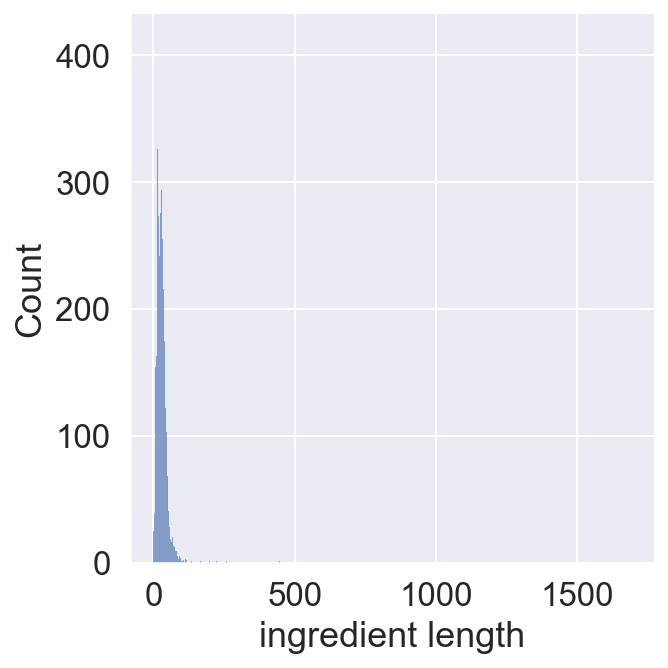

In [236]:
fig = sns.displot(test, x='ingred_len')
plt.xlabel("ingredient length")
plt.show(fig)

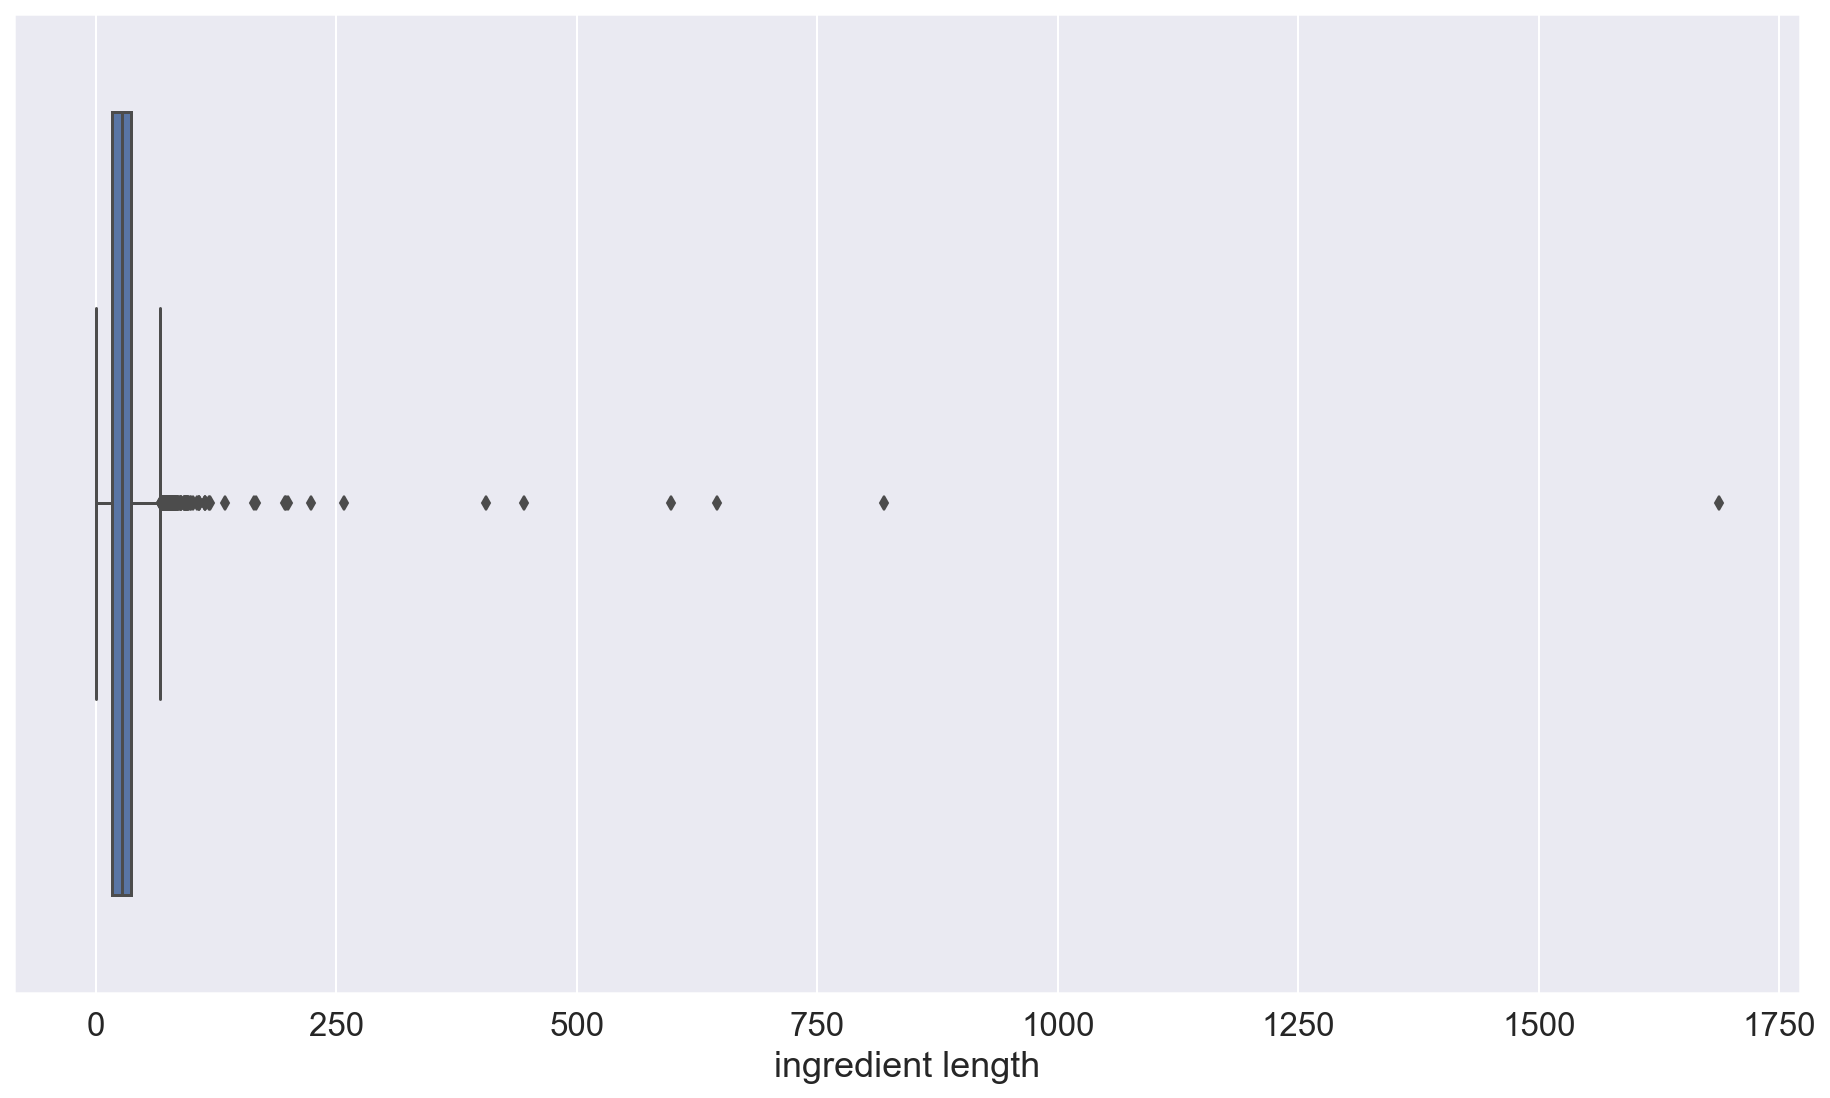

In [237]:
fig2 = sns.boxplot(x=test['ingred_len'])
plt.xlabel("ingredient length")
plt.show(fig2)

**Numeric summary of distribution**

In [238]:
test.describe()

,ingred_len
count,4997.000000
mean,29.401241
std,34.049511
min,0.000000
25%,17.000000
50%,27.000000
75%,37.000000
max,1687.000000


- Major right tail skew! Lots of outliers and should be removed

**Examine outliers**

In [249]:
# View ingredients that are past the 75% quartile

test[test.ingred_len > 39].sort_values(by=['ingred_len'], ascending=False)

,ingredient,ingred_len
4886,water panthenol dimethicone cyclopentasiloxane...,1687
3386,paul's wort) extract albizia julibrissin bark ...,819
4880,"water (aqua/eau),stearic acid,peg-8,myristic a...",646
2684,lilla glyceryl stearate stearic acid hydroxyet...,598
4798,vaccinium macrocarpon (cranberry) fruit extrac...,445
4901,water\aqua\eau ethylhexyl salicylate homosalat...,406
2994,myristic acid stearic acid lauric acid trietha...,258
425,aqua / water / eau glycerin dicaprylyl ether b...,224
3278,our formula with antioxidants developed with a...,200
3729,"polyquaternium-37,retinyl palmitate,sodium asc...",198


In [254]:
test[823,:]

TypeError: '(823, slice(None, None, None))' is an invalid key

In [27]:
# Remove ingredient rows that have > 50 characters
# - Removes about 2000 rows; len(test) = 58795, previous length = 60434
df_temp = df_temp.loc[df_temp['ingredients'].str.len() <= 50]

In [28]:
# Replace periods at the end or other words  with blanks
df_temp['ingredients']=df_temp['ingredients'].str.replace('''\.$|\*+|other ingredients\: |\(sunscreen agent|
                                                          |ultraviolet light absorber\)|eau\)|oils & sugar\)|
                                                          | \(veg|\(solvent\/diluent\)|inactive\: ''','')

In [29]:
# Correct 1,2 hexanediol
df_temp['ingredients']=df_temp['ingredients'].str.replace('2-hexanediol','1,2-hexanediol')

In [30]:
# Remove rows that contain the following words or characters
df_temp = df_temp[~df_temp['ingredients'].str.contains('because|however|please|we|because|this|error\-free|^1|\*essential oi|^$|ext')] 

In [31]:
# Replace all rows that contain string water with water, get rid of alternative spellings
df_temp['ingredients'] = np.where(df_temp['ingredients'].str.contains('water|aqua|eau'), 'water', df_temp['ingredients'])  
# Same for fragrance
df_temp['ingredients'] = np.where(df_temp['ingredients'].str.contains('fragrance|parfum'), 'fragrance', df_temp['ingredients'])  

In [32]:
# If active ingredient, paste to other column for text parsing
# df_temp['test'] = np.where(df_temp['ingredients'].str.contains('active')==True,
#                            df_temp['ingredients'],'no_actives')

In [33]:
# If active ingredient, paste to other column for text parsing
# - Make two columns, one for ingredient name, the other for the value
df_temp['active'] = np.where(df_temp['ingredients'].str.contains('active')==True,
                           df_temp['ingredients'],'no_actives')
df_temp['active_value'] = np.where(df_temp['ingredients'].str.contains('active')==True,
                           df_temp['ingredients'],'no_actives')

In [34]:
## Active ingredients
# Remove active ingredient with blanks
df_temp['active']=df_temp['active'].str.replace('.*active.*: |\d*\.*\d*%|\(\d*\.*\d*%\)| \d+\.\d+| \d+| +\(sunscreen\)','').str.strip() #|\d*.*\d*%

# Remove regex error
df_temp['active']=df_temp['active'].str.replace('solar vitis\) and bioactive berry complex','no_actives').str.strip()

# Replace avebenzone
df_temp['active']=df_temp['active'].str.replace('avobenzonem','avobenzone').str.strip()

# Separate clumped actives
df_temp['active']=df_temp['active'].str.replace('avobenzoneoctinoxateoctisalate','no_actives').str.strip() # fix later: avobenzone octinoxate octisalate

In [35]:
## Active ingredient values
# Replace % symbol and remove whitespace
df_temp['active_value']=df_temp['active_value'].str.replace('.*active.*: .* |\(|%\)|\s*%','').str.strip()

# Get rid of non-values
df_temp['active_value']=df_temp['active_value'].str.replace('sunscreen\)|solar vitis\) and bioactive 8 berry complex|acid|no_actives','0').str.strip()

# Correct avobenzone
df_temp['active_value']=df_temp['active_value'].str.replace('active: avobenzonem3.0','3').str.strip()

# Convert to numeric, divide by 100 for proportion, and change NAs to zeros
df_temp['active_value'] = pd.to_numeric(df_temp['active_value'],errors='coerce',downcast='signed').fillna(0)/100

In [36]:
# Label vitamin A 
df_temp['ingredients']=df_temp['ingredients'].str.replace('retinyl palmitate \(vitamin a\)|retinyl palmitate \(vitamin a/vitamine a\)','retinyl palmitate').str.strip()

# Label if present or absent
df_temp['vit_a'] = np.where(df_temp['ingredients'].str.contains('''retinyl palmitate|retinol|bakuchiol|
                                                                        retinyl retinoate|
                                                                        vitamin a \(hpr:hydroxypinacolone retinoate\)'''),
                                'vit_a','no_vit_a')
# Assign value
df_temp['vit_a_value'] = np.where(df_temp['ingredients'].str.contains('''retinyl palmitate|retinol|bakuchiol|
                                                                        retinyl retinoate|
                                                                        vitamin a \(hpr:hydroxypinacolone retinoate\)'''),
                                1,0)

In [37]:
# Create column for presence of ingredient in a product (excluding absences and does not account for all possible ingredients)
df_temp['ingred_value'] = 1
df_temp['skintype_value'] = 1 
df_temp['producttype_value'] = 1 

In [158]:
## Remove common or non-important ingredient rows and ingredient entry errors
# Remove rows that contain the following words or characters
df_temp = df_temp[~df_temp['ingredients'].str.contains('''phenoxyethanol|fragrance|disodium edta|citric acid|
                                                       |xanthan gum|sodium hydroxide|potassium sorbate|sodium benzoate|
                                                       |linalool|carbomer|limonene|sodium chloride|citronellol|
                                                       |geraniol|methylparaben|potassium hydroxide|bht|
                                                       |tetrasodium edta|propylparaben|benzoic acid|trisodium ethylenediamine disuccinate|
                                                       |ethylparaben|\+ plant derived / origine vtale|
                                                       |methylisothiazolinone|opens in a new windo|ulta\.com/coupons for details|
                                                       |see|eugenol|essential oi|glycerin|butylene glycol|caprylyl glycol|
                                                       |ci|ptfe|xantham gum|> denotes organically soure|ethylhexylglycerin|
                                                       |red|green|yellow|blue|organic sucrose \(brown sugar|dimethicone|
                                                       |contains less than 0\.3% thc|f\.i\.l\.# b172461/1|
                                                       |denotes certified organic ingredien|de lagriculture biologique|
                                                       |d227948/1|95% naturally derived naturellement|etc|
                                                       |soothing complex: \[sodium hyaluronate|\+plant derived/origine végétale|
                                                       |lifting phase|phenoxyethnaol|denotes organically sourced|\++|
                                                       |firming phase|with minerals|98% organic of total|\[v2968a|hotheyver|
                                                       |\[v2899a|fd \& c color| denotes organically sourced|5%|\[v2922a|
                                                       |\[v3147a\]|flavor|\(solvent\)|naturally-derived|organi|refer to the product packaging|
                                                       |depending on the location and timing of purchase|napiers moisture formul|
                                                       |xanthangum|xanathan gum|xanthum gum|the most bioavailable form of vitamin c|
                                                       |when skin is overwhelmed due to stress|for the 1st time from vichy|
                                                       |the skin¿s defenses can become overworked|violet|laureth¿4|phenoxyrthanol|
                                                       |67%|lait de chèvre\)|\[v2898a|\[v3059a\]|\[v2968a|the carefully selected|
                                                       |xenthan gum|variations in color|95% naturally derived/dérivé naturellement|
                                                       |de l¿agriculture biologique|# b201629/1''')]
# replace
#'glycerin+|'

In [1918]:
ingred_cts = df_test['ingredients'].value_counts()
ingred_cts

tocopherol                                            542
tocopheryl acetate                                    423
propanediol                                           385
cetearyl alcohol                                      384
glyceryl stearate                                     380
caprylic/capric triglyceride                          367
polysorbate 20                                        336
propylene glycol                                      280
chlorphenesin                                         272
panthenol                                             263
cetyl alcohol                                         259
squalane                                              257
allantoin                                             242
peg-100 stearate                                      235
pentylene glycol                                      235
acrylates/c10-30 alkyl acrylate crosspolymer          228
silica                                                207
hexylene glyco

In [1789]:
ingred_cts = df2['ingredients'].value_counts()
ingred_cts

water                                                 1828
glycerin                                              1446
phenoxyethanol                                        1172
butylene glycol                                        851
fragrance                                              781
disodium edta                                          738
citric acid                                            675
xanthan gum                                            672
caprylyl glycol                                        665
ethylhexylglycerin                                     629
sodium hyaluronate                                     628
dimethicone                                            622
tocopherol                                             542
sodium hydroxide                                       514
potassium sorbate                                      486
sodium benzoate                                        450
tocopheryl acetate                                     4

In [1947]:
# Print barplot of counts of each ingredient
import matplotlib.pyplot as plt
#plt.hist(ingred_cts)
#plt.show()

df_test = df_temp['ingredients'].copy().unique()
df_test2 = df_temp['ingredients'].value_counts()
#df_test.columns
#df_test.sort_values('ingred_cts', ascending=False).plot.bar()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
# Remove rows with 1 by itself, watch out for removing ceramide 1!
# Replace 2-hexanediol w/ 1,2-hexanediol
# Counts of particular types of ingredients, e.g. extracts, acids, parabens
# heuristic for AHA: glycolic acid, BHA: salicylic acid; malic acid?salicylic acid (0.5%); active: salicylic acid (1.0%)
# What about these? red 40 (ci 16035), yellow 5 (ci 19140)., fd&amp;c yellow no, 5 (ci 19140).
# Vitamin C: ascorbyl palmitate, ascorbic acid
# Vitamin A: retinyl palmitate
# iron oxides (ci 77492).
# active ingredient: salicylic acid (1.51%) : if else, paste to other columns
# other ingredients: water (aqua) : str replace other ingredients
# alcohol denat : str replace with alcohol?

In [ ]:
# Code from Jane
# import string

# gamename.translate(str.maketrans('','',string.punctuation))

## Pivot data and merge

In [38]:
# Move cleaning data 
df2 = df_temp.copy() 

In [ ]:
df2.shape

In [ ]:
df2['ingredients'].unique()[:100]

### Ordinal encoding for ingredients

In [39]:
# Add sequence for each ingredient in product
df2['ingred_order'] = df2.groupby('product')['ingred_value'].rank(method="first", ascending=True)

# Get max value of sequence and store in separate df
df2temp = df2.groupby('product')['ingred_order'].max().reset_index()

# Plus 1 so that last ingredient is 1 when take difference of max and ingredient order
# Otherwise zero will indicate that last ingredient isn't present
df2temp['ingred_order'] = df2temp['ingred_order']+1
df2temp=df2temp.rename(columns={"ingred_order":"ingred_ordinal_max"})

# Merge with original DF
df2=pd.merge(df2,df2temp,on='product')

# Take difference of ordinal max from ingredient order to get ordinal values for ingredients
df2['ingred_ordinal'] = df2["ingred_ordinal_max"] - df2["ingred_order"]

# Scale by the ordinal max so products with different numbers of ingredients are on the same scale
# minus 1 because added 1 before so last ingredient would not be zero
df2['ingred_ordinal_sc'] = df2['ingred_ordinal']/(df2["ingred_ordinal_max"]-1)

In [40]:
#df2[df2['brand']=='SUNDAY RILEY']

In [41]:
# Drop page
df2.drop(columns=['page'], inplace=True)

### Pivot ingredients long to wide

In [42]:
df3 = df2.pivot_table(index=['product','skintype','skintype_value','use_subcategory','producttype_value','active',
                             'active_value'],
                    columns='ingredients',
                    values='ingred_ordinal_sc',
                     aggfunc='max',
                     fill_value=0)
# Put index values back as columns
df3.reset_index(inplace=True)

In [164]:
df3.head()

ingredients,product,skintype,skintype_value,use_subcategory,producttype_value,active,active_value,(component of witch hazel,(rosewood) oil,(sodium lactate),...,zinc oxide (mineral),zinc oxide 10.5 %,zinc oxide 4.8%,zinc oxide 5.1%,zinc oxide 6.3%,zinc palmitoyl nonapeptide-14,zinc pca,zinc sulfate,~ ecocert,¿plant derived / origine végétale
0,''Buffet'',dry,1,face serum,1,no_actives,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,''Buffet'',oily,1,face serum,1,no_actives,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,''Buffet'' + Copper Peptides 1%,dry,1,face serum,1,no_actives,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,''Buffet'' + Copper Peptides 1%,oily,1,face serum,1,no_actives,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,+Retinol Vita C Power Serum Firming + Brighten...,dry,1,face serum,1,no_actives,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


NameError: name 'df3' is not defined

### Pivot skintype long to wide

In [43]:
# Pivot wider based on skintype
df4 = df3.pivot_table(index='product',
                    columns='skintype',
                    values='skintype_value',
                     aggfunc='max',
                     fill_value=0)

# Put index values back as columns
df4.reset_index(inplace=True)

In [44]:
# merge df for one hot encoding for skintypes
df5=pd.merge(df3,df4,on='product')

# Get rid of skintype and skintype_value columns now that they're one hot encoded
df5.drop(columns=['skintype','skintype_value'], inplace=True)

### Pivot wider based on use_subcategory

In [45]:
df4_1 = df3.pivot_table(index='product',
                    columns='use_subcategory',
                    values='producttype_value',
                     aggfunc='max',
                     fill_value=0)

# Put index values back as columns
df4_1.reset_index(inplace=True)

In [46]:
# merge df for one hot encoding for skintypes
df5=pd.merge(df5,df4_1,on='product')

# Get rid of skintype and skintype_value columns now that they're one hot encoded
df5.drop(columns=['use_subcategory','producttype_value'], inplace=True)
#df5.head()

### Pivot wider based on active

In [47]:
# Increase weighting of the active value by adding a constant of 50 plus the active amount
df2['active_value'] = np.where(df2['active_value'] > 0,
                           df2['active_value']+100,df2['active_value'])

In [170]:
df2['active_value'].describe()

count    29872.000000
mean         0.224392
std          4.732845
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.200000
Name: active_value, dtype: float64

In [48]:
df4_2 = df2.pivot_table(index='product',
                    columns='active',
                    values='active_value',
                     aggfunc='max',
                     fill_value=0)

# Put index values back as columns
df4_2.reset_index(inplace=True)

In [172]:
df2.head() 

,use_category,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,...,active_value,vit_a,vit_a_value,ingred_value,skintype_value,producttype_value,ingred_order,ingred_ordinal_max,ingred_ordinal,ingred_ordinal_sc
0,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0,29.0,Daily exfoliation is vital to healthy-looking ...,water,4.5,...,0.0,no_vit_a,0,1,1,1,1.0,39.0,38.0,1.000000
1,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0,29.0,Daily exfoliation is vital to healthy-looking ...,acrylates/steareth-20 methacrylate copolymer,4.5,...,0.0,no_vit_a,0,1,1,1,2.0,39.0,37.0,0.973684
2,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0,29.0,Daily exfoliation is vital to healthy-looking ...,acrylates copolymer,4.5,...,0.0,no_vit_a,0,1,1,1,3.0,39.0,36.0,0.947368
3,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0,29.0,Daily exfoliation is vital to healthy-looking ...,decyl glucoside,4.5,...,0.0,no_vit_a,0,1,1,1,4.0,39.0,35.0,0.921053
4,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0,29.0,Daily exfoliation is vital to healthy-looking ...,disodium cocoamphodiacetate,4.5,...,0.0,no_vit_a,0,1,1,1,5.0,39.0,34.0,0.894737


In [49]:
# merge df for one hot encoding for actives
df5=pd.merge(df5,df4_2,on='product')

In [50]:
# Get rid of skintype and skintype_value columns now that they're one hot encoded
df5.drop(columns=['active','active_value'], inplace=True)
#df5.head()

In [51]:
# Extract distinct rows since no longer need product duplicates
df5=df5.drop_duplicates(subset = ["product"])
#df5.shape

In [176]:
df5.head()

,product,(component of witch hazel,(rosewood) oil,(sodium lactate),2 hexanediol,2- hexanediol,2-h exanediol,3 propanediol,3-glyceryl ascorbate,4-dicarboxylate,...,face wash,toner,toothpaste,avobenzone,homosalate_y,no_actives,octinoxate,sulfur_y,titanium dioxide_y,zinc oxide_y
0,''Buffet'',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,''Buffet'' + Copper Peptides 1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,+Retinol Vita C Power Serum Firming + Brighten...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
6,+Retinol Vitamin C Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
8,1000 Roses Cleansing Foam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0


### Pivot wider vitamin A

In [52]:
df4_3 = df2.pivot_table(index='product',
                    columns='vit_a',
                    values='vit_a_value',
                     aggfunc='max',
                     fill_value=0)

# Put index values back as columns
df4_3.reset_index(inplace=True)

In [178]:
df4_3.head() 

vit_a,product,no_vit_a,vit_a
0,''Buffet'',0,0
1,''Buffet'' + Copper Peptides 1%,0,0
2,+Retinol Vita C Power Serum Firming + Brighten...,0,1
3,+Retinol Vitamin C Moisturizer,0,1
4,1000 Roses Cleansing Foam,0,0


In [53]:
# merge df for one hot encoding for actives
df5=pd.merge(df5,df4_3,on='product')

In [180]:
df5.head()

,product,(component of witch hazel,(rosewood) oil,(sodium lactate),2 hexanediol,2- hexanediol,2-h exanediol,3 propanediol,3-glyceryl ascorbate,4-dicarboxylate,...,toothpaste,avobenzone,homosalate_y,no_actives,octinoxate,sulfur_y,titanium dioxide_y,zinc oxide_y,no_vit_a,vit_a
0,''Buffet'',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0
1,''Buffet'' + Copper Peptides 1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0
2,+Retinol Vita C Power Serum Firming + Brighten...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1
3,+Retinol Vitamin C Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,1
4,1000 Roses Cleansing Foam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0


In [54]:
# Get rid of skintype and skintype_value columns now that they're one hot encoded
df5.drop(columns=['no_vit_a'], inplace=True)
#df5.head()

In [182]:
df5['vit_a'].values

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Additional scaling

In [55]:
# Add total ingredients column
tempdf = df2[['ingred_ordinal_max', 'product']]
tempdf = tempdf.rename(columns={'ingred_ordinal_max':'total_ingred'})
# Remove extra 1 added for ordinal encoding
tempdf['total_ingred']=tempdf['total_ingred']-1
# Remove duplicate rows
tempdf=tempdf.drop_duplicates(subset = ["product"])
#tempdf.head()
# Merge df
df6 = df5.merge(tempdf, how = 'left', on = 'product')
df6.head()

,product,# b201629/1,(component of witch hazel,(rosewood) oil,(sodium lactate),(solvent),+ plant derived / origine végétale,+contains soy,+napiers original formul,+plant derived/origine végétale,...,benzoyl peroxide,homosalate_y,no_actives,octinoxate,salicylic acid_y,sulfur_y,titanium dioxide_y,zinc oxide_y,vit_a,total_ingred
0,''Buffet'',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,100.0
1,''Buffet'' + Copper Peptides 1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,96.0
2,+Retinol Vita C Power Serum Firming + Brighten...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,72.0
3,+Retinol Vitamin C Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,123.0
4,1000 Roses Cleansing Foam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23.0


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df6[['total_ingred_sc']] = scaler.fit_transform(df6[['total_ingred']])
#df6.head()

In [1597]:
df6.head()

,product,aloe barbadensis (aloe vera) leaf juice,certified organic ingredien,cymbopogon schoenanthus (lemongrass) oil,denotes certified organic ingredient,denotes organically sourced,essential oi,limonene,organic sucrose (brown sugar,plant derived,...,benzoyl peroxide,homosalate_y,no_actives,octinoxate,salicylic acid_y,sulfur_y,titanium dioxide_y,zinc oxide_y,total_ingred,total_ingred_sc
0,''Buffet'',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.280802
1,''Buffet'' + Copper Peptides 1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.269341
2,+Retinol Vita C Power Serum Firming + Brighten...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.200573
3,+Retinol Vitamin C Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.346705
4,1000 Roses Cleansing Foam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.060172


## SVD

In [1512]:
#df6.columns[2950:]

Index(['vinyl dimethicone/methicone silsesquioxane',
       'vinylidene chloride copolymer', 'violet 2', 'violet 2 (ci 60730)',
       'violet 2)', 'vitamin a (hpr:hydroxypinacolone retinoate)',
       'vitamin b5 (panthenol)', 'vitamin c',
       'vitamin c (100% l-ascorbic acid)',
       'vitamin c (sodium ascorbyl phosphate)', 'vitamin c/ascorbic acid',
       'vitamin e (tocopherol)', 'vitamin e (tocopheryl)',
       'vitamin e (tocotrienol)', 'vitas vinifera (grape) seed oil',
       'vitis vinifera (grape seed oil)', 'vitis vinifera (grape) fruit',
       'vitis vinifera (grape) seed oil', 'vitis vinifera (grape) seed oil+',
       'vitis vinifera (grapeseed) oil',
       'vitis vinifera (organic white grape juice)',
       'vitis vinifera (white grape) juice', 'vitis viniferz (grape) seed oil',
       'volcanic ash', 'volcanic soil', 'vp/eicosene copolymer',
       'vp/va copolymer', 'water', 'wheat amino acids',
       'when skin is overwhelmed due to stress',
       'whey prot

In [62]:
## Validation fit for product type

from sklearn.decomposition import TruncatedSVD
#from scipy.sparse import csr_matrix
import seaborn as sns

# Create feature ready df
features = df6.copy().drop(['total_ingred', 'all','face moisturizer','face serum','face wash',
                           'toner','toothpaste'],axis=1).set_index('product')


In [84]:
df6.columns[-30:]

Index(['zinc oxide (mineral)', 'zinc oxide 10.5 %', 'zinc oxide 4.8%',
       'zinc oxide 5.1%', 'zinc oxide 6.3%', 'zinc palmitoyl nonapeptide-14',
       'zinc pca', 'zinc sulfate', '~ ecocert',
       '¿plant derived / origine végétale', 'Unknown', 'all', 'dry', 'normal',
       'oily', 'face moisturizer', 'face serum', 'face wash', 'toner',
       'toothpaste', 'avobenzone', 'homosalate_y', 'no_actives', 'octinoxate',
       'sulfur_y', 'titanium dioxide_y', 'zinc oxide_y', 'vit_a',
       'total_ingred', 'total_ingred_sc'],
      dtype='object')

In [126]:
df6.loc[df6['vit_a'] == 1]

,product,(component of witch hazel,(rosewood) oil,(sodium lactate),2 hexanediol,2- hexanediol,2-h exanediol,3 propanediol,3-glyceryl ascorbate,4-dicarboxylate,...,toothpaste,avobenzone,homosalate_y,no_actives,octinoxate,sulfur_y,titanium dioxide_y,zinc oxide_y,vit_a,total_ingred
2,+Retinol Vita C Power Serum Firming + Brighten...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,46.0
3,+Retinol Vitamin C Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,81.0
18,A+ High-Dose Retinoid Serum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,34.0
44,Advanced Retinol Concentrated Serum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,52.0
51,Age Reform Hydro-Dynamic Ultimate Moisture,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,Vital Vita 12 Calming Ampoule,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,84.0
810,Vital Vita 12 Poresole Ampoule,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,44.0
811,Vital Vita 12 Synergy Ampoule,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,86.0
822,Vitamin C Renewing Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,30.0


In [109]:
df6['vit_a'].values

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
## FIT SVD FOR SPARSE DATA
# Load libraries

from sklearn.decomposition import TruncatedSVD
#from scipy.sparse import csr_matrix
import seaborn as sns

# Create feature ready df
#features = df6.copy().drop(['total_ingred'],axis=1).set_index('product')
# Try removing features that will wash out the important ingredients
features = df6.copy().drop(['total_ingred','total_ingred_sc','no_actives'],axis=1).set_index('product')

In [1971]:
features.shape

(853, 2194)

In [58]:
# Create a TSVD
tsvd = TruncatedSVD(n_components=20)

# Conduct TSVD on sparse matrix
X_sparse_tsvd = tsvd.fit(features).transform(features)
df7 = pd.DataFrame(X_sparse_tsvd)

In [187]:
# Sum of first three components' explained variance ratios
dat_plot = pd.DataFrame(tsvd.explained_variance_ratio_[0:400])
tsvd.explained_variance_ratio_[0:20].sum()

0.987523990357333

In [441]:
# Eigenvalues
tsvd.explained_variance_

array([0.1837389 , 0.36298439, 0.33308637, 0.25325717, 0.21017713,
       0.18003669, 0.15449495, 0.13563904, 0.12890032, 0.12637338,
       0.11109831, 0.10867418, 0.09740543, 0.09671291, 0.09551439,
       0.09303635, 0.08918521, 0.08845115, 0.08529319, 0.08328756,
       0.08136854, 0.07814838, 0.07706576, 0.07507417, 0.07212604,
       0.07175233, 0.07055295, 0.0671992 , 0.06681318, 0.06556072,
       0.06150146, 0.06098436, 0.0601717 , 0.06001009, 0.05839092,
       0.05610916, 0.05579048, 0.0544885 , 0.05276866, 0.05188954,
       0.05089707, 0.04950202, 0.04856195, 0.04819334, 0.04785062,
       0.04656478, 0.04534316, 0.04478381, 0.04449258, 0.04376333,
       0.04280615, 0.04263771, 0.04141139, 0.04066093, 0.0397463 ,
       0.0394692 , 0.03861206, 0.0382935 , 0.03767547, 0.03658265,
       0.03606214, 0.03563213, 0.03526112, 0.03462202, 0.03392248,
       0.03371947, 0.03339821, 0.03280109, 0.03192367, 0.03169268,
       0.03138058, 0.03057876, 0.03052861, 0.02987992, 0.02928

In [ ]:
# Plot 
ax = sns.barplot(x="day", y="tsvd.explained_variance_ratio_[0:2]", data=dat_plot)

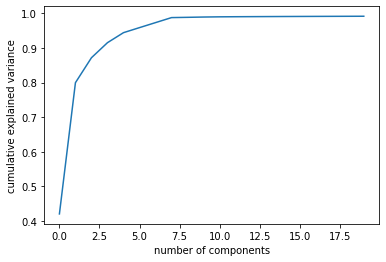

In [59]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(tsvd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [81]:
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,product
0,0.009204,0.011341,0.023269,0.001106,0.009278,0.010914,1.280548,-0.890542,-0.761047,-0.122545,...,0.114051,0.090415,-0.051842,0.050151,0.164309,-0.256390,-0.048726,-0.102896,0.129645,''Buffet''
1,0.009203,0.011328,0.023106,0.001185,0.009275,0.010904,1.269015,-0.896785,-0.755626,-0.141973,...,0.091836,0.091219,-0.059858,0.045809,0.154833,-0.249628,-0.024380,-0.081873,0.128700,''Buffet'' + Copper Peptides 1%
2,0.010524,0.016308,0.034288,-0.006236,0.008147,0.010867,1.504534,-0.736024,-0.919158,-0.257619,...,0.014196,-0.145393,0.047914,0.163364,0.069261,-0.063634,-0.029601,-0.115917,0.068486,+Retinol Vita C Power Serum Firming + Brighten...
3,0.024508,0.048238,0.081195,-0.000768,0.022494,0.010883,2.246672,1.589907,-0.383671,-0.096132,...,-0.055208,0.391547,0.074795,0.367636,0.299469,-0.028914,-0.335573,-0.127272,0.300350,+Retinol Vitamin C Moisturizer
4,0.009194,0.011118,0.025220,0.006961,0.008404,0.010640,1.044953,-0.222914,0.417666,0.170021,...,0.008703,-0.022128,-0.178731,-0.002133,-0.017123,0.000331,0.029022,-0.062398,0.091851,1000 Roses Cleansing Foam


In [64]:
# Add product info back into SVD df results
df7['product']=df6['product']

# Extract OG product info
product_details=df2[['product','brand','use_subcategory','active','price','size','ratings','total_reviews','link']].copy()

# Rename
product_details=product_details.rename(columns={'use_subcategory':'product_type'})

# price per oz
product_details['price_oz']=(product_details['price']/product_details['size']).round(2)

# Merge product deets with SVD results
df8 = product_details.merge(df7, how = 'left', on = 'product')

# drop duplicates
df8=df8.drop_duplicates(subset = ["product"])

# Reset index
df8.reset_index(drop=True)

# arrange df similarly
df8=df8.sort_values('product')
df6=df6.sort_values('product')

# add vit a
df8['vit_a']=df6['vit_a'].values

#df8.head(n=5)

In [139]:
df8.head()

,product,brand,product_type,active,price,size,ratings,total_reviews,link,price_oz,...,41,42,43,44,45,46,47,48,49,vit_a
10434,''Buffet'',The Ordinary,face serum,no_actives,14.80,1.0,4.4,333,https://www.ulta.com/buffet?productId=pimprod2...,14.80,...,0.114051,0.090415,-0.051842,0.050151,0.164309,-0.256390,-0.048726,-0.102896,0.129645,0
8418,''Buffet'' + Copper Peptides 1%,The Ordinary,face serum,no_actives,28.90,1.0,4.3,52,https://www.ulta.com/buffet-copper-peptides-1?...,28.90,...,0.091836,0.091219,-0.059858,0.045809,0.154833,-0.249628,-0.024380,-0.081873,0.128700,0
8372,+Retinol Vita C Power Serum Firming + Brighten...,Kate Somerville,face serum,no_actives,98.00,1.0,4.3,47,https://www.ulta.com/retinol-vita-c-power-seru...,98.00,...,0.014196,-0.145393,0.047914,0.163364,0.069261,-0.063634,-0.029601,-0.115917,0.068486,1
20702,+Retinol Vitamin C Moisturizer,Kate Somerville,face moisturizer,no_actives,90.00,1.7,3.7,10,https://www.ulta.com/retinol-vitamin-c-moistur...,52.94,...,-0.055208,0.391547,0.074795,0.367636,0.299469,-0.028914,-0.335573,-0.127272,0.300350,1
6092,1000 Roses Cleansing Foam,Andalou Naturals,face wash,no_actives,12.99,0.6,4.8,10,https://www.ulta.com/1000-roses-cleansing-foam...,21.65,...,0.008703,-0.022128,-0.178731,-0.002133,-0.017123,0.000331,0.029022,-0.062398,0.091851,0


In [135]:
df6.head()#sort_values('product')

,product,(component of witch hazel,(rosewood) oil,(sodium lactate),2 hexanediol,2- hexanediol,2-h exanediol,3 propanediol,3-glyceryl ascorbate,4-dicarboxylate,...,toothpaste,avobenzone,homosalate_y,no_actives,octinoxate,sulfur_y,titanium dioxide_y,zinc oxide_y,vit_a,total_ingred
0,''Buffet'',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,60.0
1,''Buffet'' + Copper Peptides 1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,58.0
2,+Retinol Vita C Power Serum Firming + Brighten...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,46.0
3,+Retinol Vitamin C Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,81.0
4,1000 Roses Cleansing Foam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,14.0


In [121]:
df6['vit_a'].dtype

dtype('int64')

In [128]:
df8['vit_a']

0      0
36     0
63     1
105    1
126    0
Name: vit_a, dtype: int64

,product,brand,product_type,active,price,size,ratings,total_reviews,link,price_oz,...,41,42,43,44,45,46,47,48,49,vit_a
0,The Microdelivery Exfoliating Facial Wash,Philosophy,face wash,no_actives,29.00,8.00,4.5,812,https://www.ulta.com/microdelivery-exfoliating...,3.62,...,0.025182,-0.027935,0.048542,0.168888,-0.064342,-0.029877,0.023201,-0.050958,-0.074378,0
1,AHA/BHA Exfoliating Cleanser,Murad,face wash,no_actives,40.00,6.75,4.6,267,https://www.ulta.com/ahabha-exfoliating-cleans...,5.93,...,0.145476,0.023719,0.078348,-0.187813,0.074210,0.173912,0.006308,0.105570,0.038466,0
2,Hydrating Facial Cleanser,CeraVe,face wash,no_actives,13.49,8.00,4.2,700,https://www.ulta.com/hydrating-facial-cleanser...,1.69,...,0.134936,-0.012049,0.238888,-0.189581,-0.185041,-0.154400,0.117378,-0.028735,0.241734,1
3,Anti-Aging Cleansing Gel,Peter Thomas Roth,face wash,no_actives,39.00,8.50,4.5,330,https://www.ulta.com/anti-aging-cleansing-gel?...,4.59,...,0.125236,0.269273,0.142161,-0.001903,0.021177,0.108418,-0.010157,-0.007142,0.047504,1
4,Essential-C Cleanser,Murad,face wash,no_actives,40.00,6.75,4.6,272,https://www.ulta.com/essential-c-cleanser?prod...,5.93,...,0.097427,0.082206,0.236783,-0.321999,-0.282681,0.055476,-0.209665,0.014304,-0.161765,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Antiplaque & Whitening Toothpaste Peppermint,Tom's of Maine,toothpaste,no_actives,4.69,5.50,4.7,40,https://www.walgreens.com/store/c/tom's-of-mai...,0.85,...,0.236100,0.034250,-0.077789,0.038679,0.254285,0.001381,0.121588,0.084932,0.046293,0
849,Anticavity Fluoride Toothpaste with Whitening ...,Colgate MaxFresh,toothpaste,no_actives,3.49,6.00,4.7,71,https://www.walgreens.com/store/c/colgate-maxf...,0.58,...,0.288956,0.129749,-0.478267,0.129268,0.412880,0.080882,0.295295,-0.081433,0.013384,0
850,Good Genes All-In-One Lactic Acid Treatment,SUNDAY RILEY,face serum,no_actives,85.00,1.00,4.1,104,https://www.ulta.com/good-genes-all-in-one-lac...,85.00,...,0.060481,-0.257833,-0.030133,0.167019,-0.003906,0.109727,0.090280,0.031370,-0.071883,0
851,A+ High-Dose Retinoid Serum,SUNDAY RILEY,face serum,no_actives,85.00,1.00,4.4,30,https://www.ulta.com/a-high-dose-retinoid-seru...,85.00,...,0.255389,-0.131660,-0.290169,0.536320,0.232750,0.144092,0.310105,0.207430,0.222960,0


## Multidimensional Scaling (MDS)

In [1645]:
from sklearn.manifold import MDS

# Create feature ready df
features = df6.copy().drop(['total_ingred'],axis=1).set_index('product')

In [1646]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(features)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

ValueError: array must be 2-dimensional and square. shape = (868, 3071)

## Isomap

In [1647]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(features)
manifold_2Da = iso.transform(features)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])
manifold_2D

In [1648]:
manifold_2D

,Component 1,Component 2
0,-4.608253,-0.258623
1,-4.582941,-0.255350
2,-4.276795,-0.455676
3,0.238785,1.949260
4,-0.147978,-4.159920
5,-0.649284,0.283176
6,-4.211385,-0.228256
7,3.274034,-3.806132
8,-0.285016,3.438799
9,5.948327,3.685808


## TSNE

In [1667]:
from sklearn.manifold import TSNE
import seaborn as sns
from bioinfokit.visuz import cluster

In [1650]:
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,product
0,1.410971,-0.996808,-0.881610,-0.158637,0.139026,0.081694,0.228870,-0.074884,-0.284180,0.318604,...,-0.033571,-0.141965,0.028490,-0.048409,-0.007428,-0.133777,0.013843,0.005667,-0.054214,''Buffet''
1,1.385511,-1.007105,-0.874613,-0.177734,0.133217,0.060337,0.211541,-0.087430,-0.267193,0.307600,...,-0.033012,-0.135713,0.017977,-0.046198,-0.005709,-0.132480,0.020181,0.007910,-0.044555,''Buffet'' + Copper Peptides 1%
2,1.397458,-0.824805,-0.932348,-0.291046,0.177248,-0.307962,0.016695,0.192619,0.275030,-0.059395,...,0.079578,-0.048893,-0.036362,-0.036613,-0.075739,0.072118,-0.048611,0.062453,0.029071,+Retinol Vita C Power Serum Firming + Brighten...
3,2.976624,1.305337,0.070063,-0.417562,-0.575400,-0.686137,0.161238,0.568390,0.812400,-0.117759,...,0.048403,-0.247343,-0.018102,0.032433,-0.226699,0.166109,-0.116106,0.011479,-0.005191,+Retinol Vitamin C Moisturizer
4,1.194567,-0.516329,0.456397,-0.077699,-0.611891,0.080088,-0.326608,0.155323,-0.671238,0.491782,...,0.074746,0.021783,0.128623,0.032389,-0.075601,-0.060897,-0.107591,0.025292,0.020983,1000 Roses Cleansing Foam


In [1690]:
# Use df7 that is directly from SVD and doesn't have product added to it
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(df7)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 868 samples in 0.005s...
[t-SNE] Computed neighbors for 868 samples in 0.370s...
[t-SNE] Computed conditional probabilities for sample 868 / 868
[t-SNE] Mean sigma: 0.127644
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.894241
[t-SNE] KL divergence after 300 iterations: 2.041416


In [1658]:
features_plot = features.copy()

In [1691]:
cluster.tsneplot(score=tsne_results)

In [88]:
## PUT TSNE RESULTS IN DF
df_tsne = pd.DataFrame(tsne_results)

# Add product info back into TSNE df results
df_tsne['product']=df6['product']
# Extract OG product info
product_details=df2[['product','brand','use_subcategory','active','price','size','ratings','total_reviews','link']].copy()
# Rename
product_details=product_details.rename(columns={'use_subcategory':'product_type'})
# price per oz
product_details['price_oz']=(product_details['price']/product_details['size']).round(2)
# Merge product deets with SVD results
df_tsne = product_details.merge(df_tsne, how = 'left', on = 'product')
# drop duplicates
df_tsne=df_tsne.drop_duplicates(subset = ["product"])

NameError: name 'tsne_results' is not defined

In [1696]:
# Export data for analysis
df_tsne.to_csv(f"{rpath}/data/data_clean.csv",index=True)

In [1664]:
color_class = df['class'].to_numpy()
cluster.tsneplot(score=tsne_score, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1152x720 with 1 Axes>

## Check and export data

In [83]:
df8.loc[df8['brand']=='SUNDAY RILEY']

,product,brand,product_type,active,vit_a,price,size,ratings,total_reviews,link,...,40,41,42,43,44,45,46,47,48,49
6367,Ceramic Slip Cleanser,SUNDAY RILEY,face wash,no_actives,no_vit_a,35.0,5.00,3.2,33,https://www.ulta.com/ceramic-slip-cleanser?pro...,...,-0.253345,-0.035454,-0.094405,0.064425,0.324565,0.043244,-0.400422,0.019717,0.228416,-0.133120
7112,Pink Drink Firming Resurfacing Essence,SUNDAY RILEY,toner,no_actives,no_vit_a,48.0,6.75,5.0,2,https://www.ulta.com/pink-drink-firming-resurf...,...,-0.112291,0.476284,-0.028652,0.285159,-0.344243,0.007519,-0.441610,0.499462,0.055843,0.122928
27215,Good Genes All-In-One Lactic Acid Treatment,SUNDAY RILEY,face serum,no_actives,no_vit_a,85.0,1.00,4.1,104,https://www.ulta.com/good-genes-all-in-one-lac...,...,-0.265798,0.060481,-0.257833,-0.030133,0.167019,-0.003906,0.109727,0.090280,0.031370,-0.071883
27230,A+ High-Dose Retinoid Serum,SUNDAY RILEY,face serum,no_actives,no_vit_a,85.0,1.00,4.4,30,https://www.ulta.com/a-high-dose-retinoid-seru...,...,-0.456678,0.255389,-0.131660,-0.290169,0.536320,0.232750,0.144092,0.310105,0.207430,0.222960
27264,C.E.O. 15% Vitamin C Brightening Serum,SUNDAY RILEY,face serum,no_actives,no_vit_a,85.0,1.00,3.8,43,https://www.ulta.com/ceo-15-vitamin-c-brighten...,...,-0.280045,0.117114,-0.435442,0.297068,-0.076259,-0.020235,0.105229,0.204835,0.017632,-0.068019


In [124]:
df8

,product,brand,product_type,active,price,size,ratings,total_reviews,link,price_oz,...,41,42,43,44,45,46,47,48,49,vit_a
0,The Microdelivery Exfoliating Facial Wash,Philosophy,face wash,no_actives,29.00,8.00,4.5,812,https://www.ulta.com/microdelivery-exfoliating...,3.62,...,0.025182,-0.027935,0.048542,0.168888,-0.064342,-0.029877,0.023201,-0.050958,-0.074378,0
36,AHA/BHA Exfoliating Cleanser,Murad,face wash,no_actives,40.00,6.75,4.6,267,https://www.ulta.com/ahabha-exfoliating-cleans...,5.93,...,0.145476,0.023719,0.078348,-0.187813,0.074210,0.173912,0.006308,0.105570,0.038466,0
63,Hydrating Facial Cleanser,CeraVe,face wash,no_actives,13.49,8.00,4.2,700,https://www.ulta.com/hydrating-facial-cleanser...,1.69,...,0.134936,-0.012049,0.238888,-0.189581,-0.185041,-0.154400,0.117378,-0.028735,0.241734,1
105,Anti-Aging Cleansing Gel,Peter Thomas Roth,face wash,no_actives,39.00,8.50,4.5,330,https://www.ulta.com/anti-aging-cleansing-gel?...,4.59,...,0.125236,0.269273,0.142161,-0.001903,0.021177,0.108418,-0.010157,-0.007142,0.047504,1
126,Essential-C Cleanser,Murad,face wash,no_actives,40.00,6.75,4.6,272,https://www.ulta.com/essential-c-cleanser?prod...,5.93,...,0.097427,0.082206,0.236783,-0.321999,-0.282681,0.055476,-0.209665,0.014304,-0.161765,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27199,Antiplaque & Whitening Toothpaste Peppermint,Tom's of Maine,toothpaste,no_actives,4.69,5.50,4.7,40,https://www.walgreens.com/store/c/tom's-of-mai...,0.85,...,0.236100,0.034250,-0.077789,0.038679,0.254285,0.001381,0.121588,0.084932,0.046293,0
27205,Anticavity Fluoride Toothpaste with Whitening ...,Colgate MaxFresh,toothpaste,no_actives,3.49,6.00,4.7,71,https://www.walgreens.com/store/c/colgate-maxf...,0.58,...,0.288956,0.129749,-0.478267,0.129268,0.412880,0.080882,0.295295,-0.081433,0.013384,0
27215,Good Genes All-In-One Lactic Acid Treatment,SUNDAY RILEY,face serum,no_actives,85.00,1.00,4.1,104,https://www.ulta.com/good-genes-all-in-one-lac...,85.00,...,0.060481,-0.257833,-0.030133,0.167019,-0.003906,0.109727,0.090280,0.031370,-0.071883,0
27230,A+ High-Dose Retinoid Serum,SUNDAY RILEY,face serum,no_actives,85.00,1.00,4.4,30,https://www.ulta.com/a-high-dose-retinoid-seru...,85.00,...,0.255389,-0.131660,-0.290169,0.536320,0.232750,0.144092,0.310105,0.207430,0.222960,0


In [61]:
# Export data for analysis
df8.to_csv(f"{rpath}/data/data_clean.csv",index=True)
#df8.shape

In [65]:
# Export data for validation
df8.to_csv(f"{rpath}/data/data_clean_prodtype_valid.csv",index=True)
df8.shape

(880, 31)

In [752]:
df8.loc[df8['product_type']=='toothpaste']

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,0,...,190,191,192,193,194,195,196,197,198,199
17129,Sensitivity Whitening Plus Scope Toothpaste Mi...,Crest,toothpaste,NaN,NaN,4.7,<NA>,https://www.walgreens.com/store/c/crest-sensit...,NaN,0.923008,...,-0.018721,-0.006079,-0.006718,0.030224,-0.000054,-0.000381,-0.047090,0.048847,-0.040650,0.042781
17146,Peppermint Toothpaste Peppermint,Dr. Bronner's,toothpaste,NaN,NaN,4.8,<NA>,https://www.walgreens.com/store/c/dr.-bronner'...,NaN,0.514171,...,-0.016996,0.170271,0.076920,-0.004425,-0.068206,-0.018829,0.191683,-0.044516,0.037729,0.088809
17160,Gentle Mint Fluoride Toothpaste Mint,Biotene,toothpaste,NaN,NaN,3.9,<NA>,https://www.walgreens.com/store/c/biotene-gent...,NaN,0.852685,...,-0.083440,0.013792,0.009967,0.023270,-0.010453,0.063252,0.022849,0.084390,-0.006966,-0.006731
